# 📊 Feature Scaling and Standardization in Machine Learning

## 🔍 Project Overview

This project demonstrates the importance of **feature scaling**—specifically, **standardization**—when training machine learning models like **Linear Regression**. Using a dataset from a cosmetics brand's Facebook activity, we analyze how differences in feature scales can affect model interpretation and performance.

### 🎯 Objectives

- Explore differences in feature scales
- Apply `StandardScaler` to standardize data
- Visualize the effects of scaling on feature distributions
- Prepare standardized data for model training

### 🧰 Tools & Libraries

- Python 3.x
- pandas, numpy – data handling
- matplotlib, seaborn – data visualization
- scikit-learn – preprocessing and modeling

---

Standardizing features ensures that all variables contribute equally to the model, especially when features are on very different scales. This notebook provides a clear, visual explanation of why and how to scale features in a machine learning pipeline.

Original mean (Page total likes): 123010.4075
Original std (Page total likes): 16495.089569670236
Scaled mean (train): -7.993605777301127e-17
Scaled std (train): 1.0
Scaled mean (test): 0.05570400185576976
Scaled std (test): 0.9240888569028856


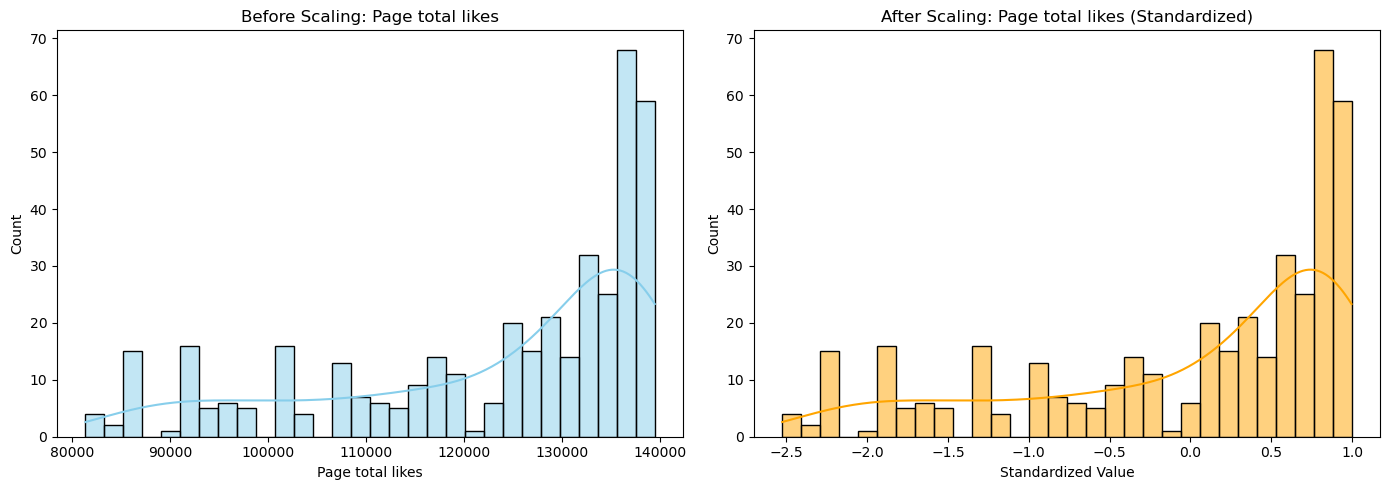

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
fb = pd.read_csv('datasets/dataset_facebook_cosmetics_us.csv', sep=';')

# Separar características y variable objetivo
X = fb.drop('Total Interactions', axis=1)
y = fb['Total Interactions']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Mostrar estadísticas antes del escalado
print('Original mean (Page total likes):', np.mean(X_train['Page total likes']))
print('Original std (Page total likes):', np.std(X_train['Page total likes']))

# Escalar
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Obtener la columna estandarizada específica (columna 0 = 'Page total likes')
page_likes_scaled_train = X_train_st[:, 0]
page_likes_scaled_test = X_test_st[:, 0]

# Mostrar estadísticas después del escalado
print('Scaled mean (train):', np.mean(page_likes_scaled_train))
print('Scaled std (train):', np.std(page_likes_scaled_train))
print('Scaled mean (test):', np.mean(page_likes_scaled_test))
print('Scaled std (test):', np.std(page_likes_scaled_test))

# Crear gráficos antes y después del escalado
plt.figure(figsize=(14, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(X_train['Page total likes'], kde=True, bins=30, color='skyblue')
plt.title('Before Scaling: Page total likes')
plt.xlabel('Page total likes')

# Histograma estandarizado
plt.subplot(1, 2, 2)
sns.histplot(page_likes_scaled_train, kde=True, bins=30, color='orange')
plt.title('After Scaling: Page total likes (Standardized)')
plt.xlabel('Standardized Value')

plt.tight_layout()
plt.show()

## ✅ Conclusions

- Features with very different scales can **negatively impact model performance** in algorithms like Linear Regression.
- Without standardization, features with larger numerical ranges can dominate the learning process and lead to misleading coefficient interpretations.
- After applying `StandardScaler`, all features were rescaled to have **mean = 0** and **standard deviation = 1**, which helps the model treat them equally.
- Visualizing distributions before and after scaling confirms the transformation: continuous features become normally distributed, and binary features are rescaled accordingly.
- Feature scaling is an essential step in any machine learning pipeline involving distance-based models or gradient-based optimizers.

📌 **Takeaway:**  
Always standardize your data before training regression models (and many others). This simple step can drastically improve model performance and interpretability.